In [ ]:
import matplotlib.pyplot as plt
import random
import json
import numpy as np
import librosa
import math
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

from google.colab import drive
drive.mount('/content/drive')
#Im trying to find my language dataset which I already transform it into json
jsonPath = "/content/drive/MyDrive/languageSample/dataLanguage.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def dataFiller(jsonPath):

    with open(jsonPath, "r") as f:
        myList = json.load(f)

    # convert lists to numpy arrays
    mfccArray = np.array(myList["mfcc"])
    labelsArray = np.array(myList["labels"])

    print("Your list is succesfully converted to numpy")

    return  mfccArray, labelsArray

# load data
mfccArray, labelsArray = dataFiller(jsonPath)
mfccArray.shape

Your list is succesfully converted to numpy


(3000, 130, 13)

In [ ]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(mfccArray, labelsArray, test_size=0.3)
# build network topology
simulation = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(mfccArray.shape[1], mfccArray.shape[2])),
    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),
    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),
    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),
    # output layer
    keras.layers.Dense(10, activation='softmax')
])

# compile model
advancer = keras.optimizers.Adam(learning_rate=0.0001)
simulation.compile(optimizer=advancer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
information = simulation.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Epoch 1/50
66/66 [==============================] - 1s 12ms/step - loss: 11.8990 - accuracy: 0.5010 - val_loss: 4.8183 - val_accuracy: 0.6222
Epoch 2/50
66/66 [==============================] - 1s 9ms/step - loss: 3.6114 - accuracy: 0.6614 - val_loss: 4.4056 - val_accuracy: 0.6156
Epoch 3/50
66/66 [==============================] - 1s 9ms/step - loss: 2.4635 - accuracy: 0.7052 - val_loss: 3.7399 - val_accuracy: 0.6344
Epoch 4/50
66/66 [==============================] - 1s 9ms/step - loss: 1.4641 - accuracy: 0.7752 - val_loss: 3.3618 - val_accuracy: 0.6356
Epoch 5/50
66/66 [==============================] - 1s 9ms/step - loss: 0.9028 - accuracy: 0.8238 - val_loss: 3.1274 - val_accuracy: 0.6411
Epoch 6/50
66/66 [==============================] - 1s 9ms/step - loss: 0.7177 - accuracy: 0.8433 - val_loss: 3.0272 - val_accuracy: 0.6411
Epoch 7/50
66/66 [==============================] - 1s 9ms/step - loss: 0.6641 - accuracy: 0.8595 - val_loss: 3.8335 - val_accuracy: 0.6233
Epoch 8/50
66/66 [

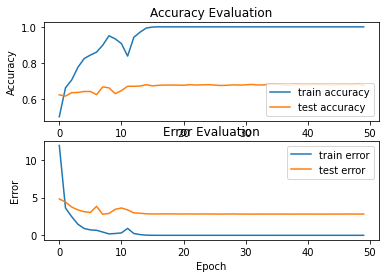

In [ ]:
def plotAccuracyError(information):
    fig, ax = plt.subplots(2)
    # create accuracy sublpot
    ax[0].plot(information.history["accuracy"], label="train accuracy")
    ax[0].plot(information.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy Evaluation")
    # create error sublpot
    ax[1].plot(information.history["loss"], label="train error")
    ax[1].plot(information.history["val_loss"], label="test error")
    ax[1].set_ylabel("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(loc="upper right")
    ax[1].set_title("Error Evaluation")
    plt.show()
# plot accuracy and error as a function of the epochs
plotAccuracyError(information)

In [ ]:
# build network topology
simulation_network_topology = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(mfccArray.shape[1], mfccArray.shape[2])),
    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
advancer = keras.optimizers.Adam(learning_rate=0.0001)
simulation_network_topology.compile(optimizer=advancer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
information = simulation_network_topology.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
66/66 [==============================] - 2s 15ms/step - loss: 43.5833 - accuracy: 0.3443 - val_loss: 6.6123 - val_accuracy: 0.5256
Epoch 2/100
66/66 [==============================] - 1s 13ms/step - loss: 18.0241 - accuracy: 0.3781 - val_loss: 5.1552 - val_accuracy: 0.5100
Epoch 3/100
66/66 [==============================] - 1s 12ms/step - loss: 12.5122 - accuracy: 0.4014 - val_loss: 3.8328 - val_accuracy: 0.5322
Epoch 4/100
66/66 [==============================] - 1s 12ms/step - loss: 9.7666 - accuracy: 0.4133 - val_loss: 2.7442 - val_accuracy: 0.5511
Epoch 5/100
66/66 [==============================] - 1s 13ms/step - loss: 7.8186 - accuracy: 0.4295 - val_loss: 2.6711 - val_accuracy: 0.5500
Epoch 6/100
66/66 [==============================] - 1s 12ms/step - loss: 6.4249 - accuracy: 0.4271 - val_loss: 2.5205 - val_accuracy: 0.5600
Epoch 7/100
66/66 [==============================] - 1s 12ms/step - loss: 5.3702 - accuracy: 0.4657 - val_loss: 2.4509 - val_accuracy: 0.5611
Epo

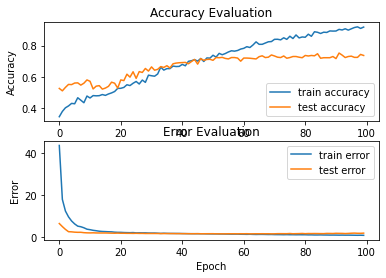

In [ ]:
# plot accuracy and error as a function of the epochs
plotAccuracyError(information)

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(mfccArray, labelsArray, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
# add an axis to input sets
X_validation = X_validation[..., np.newaxis]
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print("X train Shape:",X_train.shape)

X train Shape: (1800, 130, 13, 1)


In [ ]:
myShape = (X_train.shape[1], X_train.shape[2], 1)
# build the CNN
cnnSimulation = keras.Sequential()

# 1st conv layer
cnnSimulation.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=myShape))
cnnSimulation.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnnSimulation.add(keras.layers.BatchNormalization())

# 2nd conv layer
cnnSimulation.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
cnnSimulation.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
cnnSimulation.add(keras.layers.BatchNormalization())

# 3rd conv layer
cnnSimulation.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
cnnSimulation.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnnSimulation.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
cnnSimulation.add(keras.layers.Flatten())
cnnSimulation.add(keras.layers.Dense(64, activation='relu'))
cnnSimulation.add(keras.layers.Dropout(0.3))

# output layer
cnnSimulation.add(keras.layers.Dense(10, activation='softmax'))

# compile model
advancer = keras.optimizers.Adam(learning_rate=0.0001)
cnnSimulation.compile(optimizer=advancer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnnSimulation.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
# train model
information = cnnSimulation.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=50)

Epoch 1/50
57/57 [==============================] - 4s 60ms/step - loss: 3.2240 - accuracy: 0.1067 - val_loss: 2.7854 - val_accuracy: 0.0222
Epoch 2/50
57/57 [==============================] - 3s 58ms/step - loss: 2.4495 - accuracy: 0.2661 - val_loss: 1.9600 - val_accuracy: 0.3222
Epoch 3/50
57/57 [==============================] - 3s 58ms/step - loss: 1.9389 - accuracy: 0.4117 - val_loss: 1.5167 - val_accuracy: 0.5067
Epoch 4/50
57/57 [==============================] - 3s 57ms/step - loss: 1.5109 - accuracy: 0.5356 - val_loss: 1.2206 - val_accuracy: 0.6178
Epoch 5/50
57/57 [==============================] - 3s 58ms/step - loss: 1.2516 - accuracy: 0.6283 - val_loss: 1.0185 - val_accuracy: 0.6956
Epoch 6/50
57/57 [==============================] - 3s 58ms/step - loss: 1.0650 - accuracy: 0.6600 - val_loss: 0.8841 - val_accuracy: 0.7333
Epoch 7/50
57/57 [==============================] - 3s 58ms/step - loss: 0.9349 - accuracy: 0.7211 - val_loss: 0.7786 - val_accuracy: 0.7467
Epoch 8/50
57

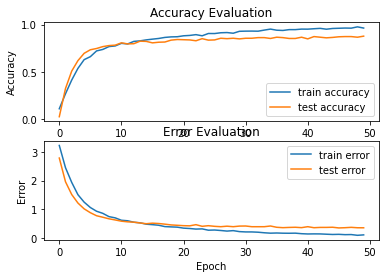

In [ ]:
# plot accuracy and error as a function of the epochs
plotAccuracyError(information)

**Model Evaluation Accuracy**

In [ ]:
# evaluate model on Test Set
trialLoss, trialAcc = cnnSimulation.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', trialAcc)

24/24 - 0s - loss: 0.3747 - accuracy: 0.8720 - 273ms/epoch - 11ms/step

Test accuracy: 0.871999979019165


In [ ]:
XtrainReducedDimension = X_train.reshape(X_train.shape[0], -1)
YtrainReducedDimension  = y_train.reshape(y_train.shape[0], -1)
XtestReducedDimension = X_test.reshape(X_test.shape[0], -1)
YtestReducedDimension  = y_test.reshape(y_test.shape[0], -1)

**Gaussian Accuracy**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#Create a Gaussian Classifier
gnb = GaussianNB()
XtrainGnb = X_train.reshape(X_train.shape[0], -1)
YtrainGnb = y_train.reshape(y_train.shape[0], -1)
#Train the model using the training sets
gnb.fit(XtrainGnb, YtrainGnb)

XtestGnb = X_test.reshape(X_test.shape[0], -1)
YtestGnb = y_test.reshape(y_test.shape[0], -1)
#Predict the response for test dataset
y_predGnB = gnb.predict(XtestGnb)
print("Gaussian Accuracy:",metrics.accuracy_score(y_test, y_predGnB))

Gaussian Accuracy: 0.7333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Accuracy**

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

XtrainRandomForest = X_train.reshape(X_train.shape[0], -1)
YtrainRandomForest = y_train.reshape(y_train.shape[0], -1)
XtestRandomForest = X_test.reshape(X_test.shape[0], -1)
YtestRandomForest = y_test.reshape(y_test.shape[0], -1)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(XtrainRandomForest,YtrainRandomForest)

y_predRandomForest=clf.predict(XtestRandomForest)

print("Random Forest Accuracy:",metrics.accuracy_score(y_test, y_predRandomForest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


Random Forest Accuracy: 0.744


**SVM Accuracy**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(XtrainReducedDimension, YtrainReducedDimension)

#Predict the response for test dataset
y_predSVM = clf.predict(XtestReducedDimension)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_predSVM))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.576


In [ ]:
cnnSimulation.save("LanguageData_CNN")
cnnSimulation.save("LanguageData_CNN.h5")
reconstructed_model = keras.models.load_model("LanguageData_CNN.h5")

Xindicator = X_test[100]
yIndicator = y_test[100]

INFO:tensorflow:Assets written to: LanguageData_CNN/assets


In [ ]:
print("my X prediction:",Xindicator.shape)
print("Real Language:", yIndicator)
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
Xindicator = Xindicator[np.newaxis, ...] # array shape (1, 130, 13, 1)
print("my X prediction with dimension added:",Xindicator.shape)


my X prediction: (130, 13, 1)
Real Language: 2
my X prediction with dimension added: (1, 130, 13, 1)


In [ ]:
# perform prediction
prediction = cnnSimulation.predict(Xindicator)
# get index with max value
indexMax = np.argmax(prediction, axis=1)

print("Language forescasted:", int(indexMax))

Language forescasted: 2


In [ ]:
# pick a sample to predict from the test set
Xindicator = X_test[50]
yIndicator = y_test[50]

print("Real Language:", yIndicator)

Xindicator = Xindicator[np.newaxis, ...]

prediction = cnnSimulation.predict(Xindicator)

# get index with max value
indexMax = np.argmax(prediction, axis=1)

print("Language Forescasted:", int(indexMax))
print("Length X Test:",len(X_test))

Real Language: 0
Language Forescasted: 0
Length X Test: 750


In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  Xindicator = X_test[i]
  yIndicator = y_test[i]

  print("\nReal Language:", yIndicator)

  Xindicator = Xindicator[np.newaxis, ...]

  prediction = cnnSimulation.predict(Xindicator)

  # get index with max value
  indexMax = np.argmax(prediction, axis=1)

  print("Forecasted Language:", int(indexMax))


Real Language: 2
Forecasted Language: 2

Real Language: 0
Forecasted Language: 0

Real Language: 0
Forecasted Language: 2

Real Language: 0
Forecasted Language: 0

Real Language: 0
Forecasted Language: 0

Real Language: 0
Forecasted Language: 0

Real Language: 1
Forecasted Language: 1

Real Language: 1
Forecasted Language: 0

Real Language: 2
Forecasted Language: 2

Real Language: 2
Forecasted Language: 1


In [ ]:
# Audio files pre-processing
def process_input(myAudioFile, track):

  numberOfSegment = 10
  numberOfFTT=2048
  hopLength=512
  samplingRate = 22050
  numberOfMFCC = 13
  trackPeriod = track # measured in seconds
  trackTrial = samplingRate * trackPeriod
  signal, rateOfSampling = librosa.load(myAudioFile, sr=samplingRate)

  trialSegment = int(trackTrial / numberOfSegment)
  mfccVectorsSegment = math.ceil(trialSegment / hopLength)
  
  
  for o in range(10):

    # calculate start and finish sample for current segment
    start = trialSegment * o
    end = start + trialSegment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:end], rateOfSampling, n_mfcc=numberOfMFCC, n_fft=numberOfFTT, hop_length=hopLength)
    mfcc = mfcc.T

    return mfcc
myLanguageDictionary = {0:"japanese",1:"arabic",2:"english"}


In [ ]:
mfccSpeech = process_input("/content/drive/MyDrive/languagesDataset2/english/english.00057.wav", 30)
type(mfccSpeech)
mfccSpeech.shape
Xindicator = mfccSpeech[np.newaxis, ..., np.newaxis]
print("My x to be predicted shape:",Xindicator.shape)

My x to be predicted shape: (1, 130, 13, 1)


In [ ]:
prediction = cnnSimulation.predict(Xindicator)

# get index with max value
indexMax = np.argmax(prediction, axis=1)

print("Forecasted Language:", myLanguageDictionary[int(indexMax)])

Forecasted Language: japanese


In [ ]:
mfccSpeech = process_input("/content/drive/MyDrive/languagesDataset2/arabic/arabic.00057.wav", 30)

In [ ]:
Xindicator = mfccSpeech[np.newaxis, ..., np.newaxis]
Xindicator.shape

(1, 130, 13, 1)

In [ ]:
prediction = cnnSimulation.predict(Xindicator)

# get index with max value
indexMax = np.argmax(prediction, axis=1)

print("Forecasted Language:", myLanguageDictionary[int(indexMax)])

Forecasted Language: arabic


In [ ]:
mfccSpeech = process_input("/content/drive/MyDrive/languagesDataset2/japanese/japanese.00057.wav", 30)
Xindicator = mfccSpeech[np.newaxis, ..., np.newaxis]
Xindicator.shape
prediction = cnnSimulation.predict(Xindicator)

# get index with max value
indexMax = np.argmax(prediction, axis=1)

print("Forecasted Language:", myLanguageDictionary[int(indexMax)])

Forecasted Language: japanese
